In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from matplotlib.ticker import NullFormatter
# from scipy import stats
# import plotly.express as px
# plt.style.use('ggplot')   
# %matplotlib inline

In [ ]:
# pl_fig = pd.read_csv("plr_pool.csv")


In [ ]:
# pl_fig.head()


In [ ]:
# pl_fig[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

## Преобразование Бокса-Кокса
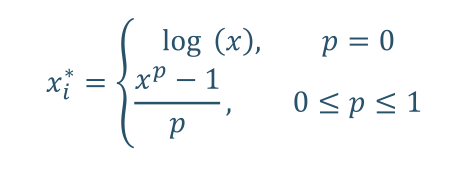

In [ ]:
# logg = (
#     pl_fig[['bets_mean', 'hands_mean']]
#     .apply(lambda w: np.log(w + 1))
#     .hist(figsize=(12,6), bins=30)
# )
# logg;

### 2-D графики

In [ ]:
# plt.scatter(pl_fig.res_sum, pl_fig.visits, color='blue')
# plt.xlabel('res_sum')
# plt.ylabel('visits');

In [ ]:
# plt.scatter(pl_fig.bets_mean, pl_fig.res_sum, color='blue')
# plt.xlabel('bets_mean')
# plt.ylabel('res_sum');

### 3D + 1

In [ ]:
# px.scatter_3d(
#     pl_fig,
#     x='res_sum',
#     y='bets_mean',
#     z='visits',
# ).show(renderer='browser')

#### 4-е измерение.
Наскокло агрессивно играет человек относительно своей ставки.(неких психо индикатор)

In [ ]:
# pl_fig['bet_std_rel'] = pl_fig['bets_std']/pl_fig['bets_mean']

### рисуем график

In [ ]:
# px.scatter_3d(
#     pl_fig,
#     x='res_sum',
#     y='bets_mean',
#     z='visits',
#     color='bet_std_rel'
# ).show(renderer='browser')

### Искусственная кластеризация 

(обычно трёх буквенная)

### Делим игроков по квантилям

Нужно определиться, что хорошо, что плохо

In [ ]:
# pl_fig['visits_quar'] = pd.qcut(pl_fig['visits'],4,['1','2','3','4'])
# pl_fig['res_sum_quar'] = pd.qcut(pl_fig['res_sum'],4,['1','2','3','4']) #['4','3','2','1']
# pl_fig['bets_mean_quar'] = pd.qcut(pl_fig['bets_mean'],4,['1','2','3','4'])

In [ ]:
pl_fig

Соеденяем в одну строку.

In [ ]:
pl_fig['vrb']= pl_fig.visits_quar.astype(str) + pl_fig.res_sum_quar.astype(str)+pl_fig.bets_mean_quar.astype(str)

In [ ]:
pl_fig

Оставлем те кластеры в которых больше 3 человеков.

In [ ]:
clusters = pl_fig['vrb'].value_counts()

In [ ]:
good_cluster = clusters[clusters >=3].index.values

In [ ]:
good_cluster

Рисуем график

In [ ]:
px.scatter_3d(
    pl_fig[pl_fig.vrb.isin(good_cluster)],
    x='res_sum',
    y='bets_mean',
    z='hands_sum',
    color='vrb'
).show(renderer='browser')
# ).show(renderer='iframe')